<center> <img src = https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/hh%20label.jpg alt="drawing" style="width:400px;">

# <center> Проект: Анализ резюме из HeadHunter
   

In [185]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Исследование структуры данных

1. Прочитайте данные с помощью библиотеки Pandas. Совет: перед чтением обратите внимание на разделитель внутри файла. 

In [186]:
#ваш код здесь
hh_data = pd.read_csv('hh_data2.csv', sep=';')


2. Выведите несколько первых (последних) строк таблицы, чтобы убедиться в том, что ваши данные не повреждены. Ознакомьтесь с признаками и их структурой.

In [187]:
#ваш код здесь
print(hh_data.head())
print(hh_data.tail())


                                   Пол, возраст           ЗП  \
0    Мужчина ,  39 лет , родился 27 ноября 1979   29000 руб.   
1     Мужчина ,  60 лет , родился 20 марта 1959   40000 руб.   
2  Женщина ,  36 лет , родилась 12 августа 1982   20000 руб.   
3      Мужчина ,  38 лет , родился 25 июня 1980  100000 руб.   
4     Женщина ,  26 лет , родилась 3 марта 1993  140000 руб.   

                           Ищет работу на должность:  \
0                            Системный администратор   
1                               Технический писатель   
2                                           Оператор   
3  Веб-разработчик (HTML / CSS / JS / PHP / базы ...   
4                  Региональный менеджер по продажам   

                        Город, переезд, командировки  \
0  Советск (Калининградская область) , не готов к...   
1  Королев , не готов к переезду , готов к редким...   
2  Тверь , не готова к переезду , не готова к ком...   
3  Саратов , не готов к переезду , готов к редким...  

3. Выведите основную информацию о числе непустых значений в столбцах и их типах в таблице.

In [188]:
print(hh_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44744 entries, 0 to 44743
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Пол, возраст                     44744 non-null  object
 1   ЗП                               44744 non-null  object
 2   Ищет работу на должность:        44744 non-null  object
 3   Город, переезд, командировки     44744 non-null  object
 4   Занятость                        44744 non-null  object
 5   График                           44744 non-null  object
 6   Опыт работы                      44576 non-null  object
 7   Последнее/нынешнее место работы  44743 non-null  object
 8   Последняя/нынешняя должность     44742 non-null  object
 9   Образование и ВУЗ                44744 non-null  object
 10  Обновление резюме                44744 non-null  object
 11  Авто                             44744 non-null  object
dtypes: object(12)
memory usage: 4.1+

4. Обратите внимание на информацию о числе непустых значений.

In [189]:
#ваш код здесь
print(hh_data.notnull().sum())


Пол, возраст                       44744
ЗП                                 44744
Ищет работу на должность:          44744
Город, переезд, командировки       44744
Занятость                          44744
График                             44744
Опыт работы                        44576
Последнее/нынешнее место работы    44743
Последняя/нынешняя должность       44742
Образование и ВУЗ                  44744
Обновление резюме                  44744
Авто                               44744
dtype: int64


5. Выведите основную статистическую информацию о столбцах.


In [190]:
#ваш код здесь
numeric_stats = hh_data.describe()
print("Статистическая информация для числовых столбцов:")
print(numeric_stats)

full_stats = hh_data.describe(include='all')
print("\nСтатистическая информация для всех столбцов:")
print(full_stats)

Статистическая информация для числовых столбцов:
                                         Пол, возраст          ЗП  \
count                                           44744       44744   
unique                                          16003         690   
top     Мужчина ,  32 года , родился 17 сентября 1986  50000 руб.   
freq                                               18        4064   

       Ищет работу на должность:  \
count                      44744   
unique                     14929   
top      Системный администратор   
freq                        3099   

                             Город, переезд, командировки         Занятость  \
count                                               44744             44744   
unique                                              10063                38   
top     Москва , не готов к переезду , не готов к кома...  полная занятость   
freq                                                 1261             30026   

             График         

# Преобразование данных

1. Начнем с простого - с признака **"Образование и ВУЗ"**. Его текущий формат это: **<Уровень образования год выпуска ВУЗ специальность...>**. Например:
* Высшее образование 2016 Московский авиационный институт (национальный исследовательский университет)...
* Неоконченное высшее образование 2000  Балтийская государственная академия рыбопромыслового флота…
Нас будет интересовать только уровень образования.

Создайте с помощью функции-преобразования новый признак **"Образование"**, который должен иметь 4 категории: "высшее", "неоконченное высшее", "среднее специальное" и "среднее".

Выполните преобразование, ответьте на контрольные вопросы и удалите признак "Образование и ВУЗ".

Совет: обратите внимание на структуру текста в столбце **"Образование и ВУЗ"**. Гарантируется, что текущий уровень образования соискателя всегда находится в первых 2ух слов и начинается с заглавной буквы. Воспользуйтесь этим.

*Совет: проверяйте полученные категории, например, с помощью метода unique()*


In [191]:
#ваш код здесь
def extract_education_level(education_str):
    # Извлекаем первые два слова
    level = ' '.join(education_str.split()[:2])
    # Определяем категорию
    if 'высшее' in level.lower():
        return 'высшее'
    elif 'неоконченное' in level.lower():
        return 'неоконченное высшее'
    elif 'среднее специальное' in level.lower():
        return 'среднее специальное'
    elif 'среднее' in level.lower():
        return 'среднее'
    else:
        return None

hh_data['Образование'] = hh_data['Образование и ВУЗ'].apply(extract_education_level)

# Проверяем уникальные значения в новом столбце
print("Уникальные значения в новом столбце 'Образование':")
print(hh_data['Образование'].unique())

# Удаляем старый столбец "Образование и ВУЗ"
hh_data.drop(columns=['Образование и ВУЗ'], inplace=True)

# Выводим итоговый DataFrame
print("\nИтоговый DataFrame:")
print(hh_data.head())


Уникальные значения в новом столбце 'Образование':
['высшее' 'среднее специальное' 'среднее']

Итоговый DataFrame:
                                   Пол, возраст           ЗП  \
0    Мужчина ,  39 лет , родился 27 ноября 1979   29000 руб.   
1     Мужчина ,  60 лет , родился 20 марта 1959   40000 руб.   
2  Женщина ,  36 лет , родилась 12 августа 1982   20000 руб.   
3      Мужчина ,  38 лет , родился 25 июня 1980  100000 руб.   
4     Женщина ,  26 лет , родилась 3 марта 1993  140000 руб.   

                           Ищет работу на должность:  \
0                            Системный администратор   
1                               Технический писатель   
2                                           Оператор   
3  Веб-разработчик (HTML / CSS / JS / PHP / базы ...   
4                  Региональный менеджер по продажам   

                        Город, переезд, командировки  \
0  Советск (Калининградская область) , не готов к...   
1  Королев , не готов к переезду , готов к редким..

2. Теперь нас интересует столбец **"Пол, возраст"**. Сейчас он представлен в формате **<Пол , возраст , дата рождения >**. Например:
* Мужчина , 39 лет , родился 27 ноября 1979 
* Женщина , 21 год , родилась 13 января 2000
Как вы понимаете, нам необходимо выделить каждый параметр в отдельный столбец.

Создайте два новых признака **"Пол"** и **"Возраст"**. При этом важно учесть:
* Признак пола должен иметь 2 уникальных строковых значения: 'М' - мужчина, 'Ж' - женщина. 
* Признак возраста должен быть представлен целыми числами.

Выполните преобразование, ответьте на контрольные вопросы и удалите признак **"Пол, возраст"** из таблицы.

*Совет: обратите внимание на структуру текста в столбце, в части на то, как разделены параметры пола, возраста и даты рождения между собой - символом ' , '. 
Гарантируется, что структура одинакова для всех строк в таблице. Вы можете воспользоваться этим.*


In [192]:
#ваш код здесь
def extract_gender_age(info_str):
    # Разделяем строку по запятой и удаляем лишние пробелы
    parts = [part.strip() for part in info_str.split(',')]

    # Извлекаем пол
    gender_str = parts[0]
    if 'Мужчина' in gender_str:
        gender = 'М'
    elif 'Женщина' in gender_str:
        gender = 'Ж'
    else:
        gender = None  # на случай, если пол не распознан

    # Извлекаем возраст
    age_str = parts[1]
    age = int(''.join(filter(str.isdigit, age_str)))  # Извлекаем только цифры и преобразуем в int

    return gender, age

# Применяем функцию к столбцу "Пол, возраст" и создаем новые столбцы "Пол" и "Возраст"
hh_data[['Пол', 'Возраст']] = hh_data['Пол, возраст'].apply(lambda x: pd.Series(extract_gender_age(x)))

# Проверяем уникальные значения в новых столбцах
print("Уникальные значения в новом столбце 'Пол':")
print(hh_data['Пол'].unique())
print("\nУникальные значения в новом столбце 'Возраст':")
print(hh_data['Возраст'].unique())

# Удаляем старый столбец "Пол, возраст"
hh_data.drop(columns=['Пол, возраст'], inplace=True)

# Выводим итоговый DataFrame
print("\nИтоговый DataFrame:")
print(hh_data.head())

Уникальные значения в новом столбце 'Пол':
['М' 'Ж']

Уникальные значения в новом столбце 'Возраст':
[ 39  60  36  38  26  29  46  34  35  59  27  21  31  37  30  33  42  32
  23  28  25  24  43  53  49  44  48  54  22  20  40  62  72  45  41  61
  50  58  57  52  56  18  19  51  16  47  71  63  55  64  68  17  73  66
  65  77  67  69  76  70  14  15 100]

Итоговый DataFrame:
            ЗП                          Ищет работу на должность:  \
0   29000 руб.                            Системный администратор   
1   40000 руб.                               Технический писатель   
2   20000 руб.                                           Оператор   
3  100000 руб.  Веб-разработчик (HTML / CSS / JS / PHP / базы ...   
4  140000 руб.                  Региональный менеджер по продажам   

                        Город, переезд, командировки  \
0  Советск (Калининградская область) , не готов к...   
1  Королев , не готов к переезду , готов к редким...   
2  Тверь , не готова к переезду , не г

3. Следующим этапом преобразуем признак **"Опыт работы"**. Его текущий формат - это: **<Опыт работы: n лет m месяцев, периоды работы в различных компаниях…>**. 

Из столбца нам необходимо выделить общий опыт работы соискателя в месяцах, новый признак назовем "Опыт работы (месяц)"

Для начала обсудим условия решения задачи:
* Во-первых, в данном признаке есть пропуски. Условимся, что если мы встречаем пропуск, оставляем его как есть (функция-преобразование возвращает NaN)
* Во-вторых, в данном признаке есть скрытые пропуски. Для некоторых соискателей в столбце стоит значения "Не указано". Их тоже обозначим как NaN (функция-преобразование возвращает NaN)
* В-третьих, нас не интересует информация, которая описывается после указания опыта работы (периоды работы в различных компаниях)
* В-четвертых, у нас есть проблема: опыт работы может быть представлен только в годах или только месяцах. Например, можно встретить следующие варианты:
    * Опыт работы 3 года 2 месяца…
    * Опыт работы 4 года…
    * Опыт работы 11 месяцев…
    * Учитывайте эту особенность в вашем коде

Учитывайте эту особенность в вашем коде

В результате преобразования у вас должен получиться столбец, содержащий информацию о том, сколько месяцев проработал соискатель.
Выполните преобразование, ответьте на контрольные вопросы и удалите столбец **"Опыт работы"** из таблицы.


In [193]:
#ваш код здесь
def extract_years_months(experience):
    # Проверка на NaN
    if pd.isna(experience):
        return np.nan

    # Инициализируем переменные для хранения лет и месяцев
    years = 0
    months = 0
    
    # Разделяем строку на слова
    words = experience.split()
    
    # Флаги для отслеживания найденных значений
    found_years = False
    found_months = False
    
    # Ищем количество лет и месяцев в строке
    for i in range(len(words)):
        if not found_years and words[i] in ["лет", "год", "года"]:
            try:
                years = int(words[i - 1])  # Предполагаем, что перед "лет" стоит число
                found_years = True  # Устанавливаем флаг, что годы найдены
            except (ValueError, IndexError):
                years = 0
        elif not found_months and words[i] in ["месяца", "месяцев"]:
            try:
                months = int(words[i - 1])  # Предполагаем, что перед "месяца" стоит число
                found_months = True  # Устанавливаем флаг, что месяцы найдены
            except (ValueError, IndexError):
                months = 0
        
        # Если оба значения найдены, выходим из цикла
        if found_years and found_months:
            break
    
    return years * 12 + months

# Проверка и преобразование столбца "Опыт работы"
if "Опыт работы" in hh_data.columns:
    # Преобразуем столбец "Опыт работы"
    hh_data["Опыт работы (месяц)"] = hh_data["Опыт работы"].apply(extract_years_months)

    # Удаляем старый столбец для чистоты данных
    hh_data.drop(columns=["Опыт работы"], inplace=True)
else:
    print("Столбец 'Опыт работы' отсутствует в данных.")

# Вывод результата для проверки
print(hh_data["Опыт работы (месяц)"])


0        202.0
1        233.0
2        123.0
3        225.0
4         67.0
         ...  
44739     91.0
44740     91.0
44741    257.0
44742     46.0
44743    190.0
Name: Опыт работы (месяц), Length: 44744, dtype: float64


4. Хорошо идем! Следующий на очереди признак "Город, переезд, командировки". Информация в нем представлена в следующем виде: **<Город , (метро) , готовность к переезду (города для переезда) , готовность к командировкам>**. В скобках указаны необязательные параметры строки. Например, можно встретить следующие варианты:

* Москва , не готов к переезду , готов к командировкам
* Москва , м. Беломорская , не готов к переезду, не готов к командировкам
* Воронеж , готов к переезду (Сочи, Москва, Санкт-Петербург) , готов к командировкам

Создадим отдельные признаки **"Город"**, **"Готовность к переезду"**, **"Готовность к командировкам"**. При этом важно учесть:

* Признак **"Город"** должен содержать только 4 категории: "Москва", "Санкт-Петербург" и "город-миллионник" (их список ниже), остальные обозначьте как "другие".

    Список городов-миллионников:
    
   <code>million_cities = ['Новосибирск', 'Екатеринбург','Нижний Новгород','Казань', 'Челябинск','Омск', 'Самара', 'Ростов-на-Дону', 'Уфа', 'Красноярск', 'Пермь', 'Воронеж','Волгоград']
    </code>
    Инфорация о метро, рядом с которым проживает соискатель нас не интересует.
* Признак **"Готовность к переезду"** должен иметь два возможных варианта: True или False. Обратите внимание, что возможны несколько вариантов описания готовности к переезду в признаке "Город, переезд, командировки". Например:
    * … , готов к переезду , …
    * … , не готова к переезду , …
    * … , готова к переезду (Москва, Санкт-Петербург, Ростов-на-Дону)
    * … , хочу переехать (США) , …
    
    Нас интересует только сам факт возможности или желания переезда.
* Признак **"Готовность к командировкам"** должен иметь два возможных варианта: True или False. Обратите внимание, что возможны несколько вариантов описания готовности к командировкам в признаке "Город, переезд, командировки". Например:
    * … , готов к командировкам , … 
    * … , готова к редким командировкам , …
    * … , не готов к командировкам , …
    
    Нас интересует только сам факт готовности к командировке.
    
    Еще один важный факт: при выгрузки данных у некоторых соискателей "потерялась" информация о готовности к командировкам. Давайте по умолчанию будем считать, что такие соискатели не готовы к командировкам.
    
Выполните преобразования и удалите столбец **"Город, переезд, командировки"** из таблицы.

*Совет: обратите внимание на то, что структура текста может меняться в зависимости от указания ближайшего метро. Учите это, если будете использовать порядок слов в своей программе.*


In [194]:
#ваш код здесь
million_cities = ['Новосибирск', 'Екатеринбург', 'Нижний Новгород', 'Казань',
                  'Челябинск', 'Омск', 'Самара', 'Ростов-на-Дону', 'Уфа',
                  'Красноярск', 'Пермь', 'Воронеж', 'Волгоград']

# Функция для извлечения информации о городе, готовности к переезду и командировкам
def extract_info(info_str):
    # Приводим строку к нижнему регистру для проверки
    info_str_lower = info_str.lower()
    
    # Удаляем часть строки, связанную с метро (если есть)
    info_str = info_str.split(',')[0]  # Убираем метро, если оно есть

    # Извлекаем город
    city = info_str.split(',')[0].strip()  # Первый элемент перед запятой
    if city in ['москва', 'санкт-петербург']:
        city_category = city
    elif city in million_cities:
        city_category = 'город-миллионник'
    else:
        city_category = 'другие'

    # Проверка готовности к переезду
    if 'готов к переезду' in info_str_lower or 'хочу переехать' in info_str_lower:
        relocation = True
    elif 'не готов к переезду' in info_str_lower or 'не готова к переезду' in info_str_lower:
        relocation = False
    else:
        relocation = np.nan  # Если информация отсутствует

    # Проверка готовности к командировкам
    if 'готов к командировкам' in info_str_lower or 'готова к командировкам' in info_str_lower:
        travel = True
    elif 'не готов к командировкам' in info_str_lower or 'не готова к командировкам' in info_str_lower:
        travel = False
    else:
        travel = False  # По умолчанию считаем, что не готовы

    return city_category, relocation, travel

# Применяем функцию к столбцу "Город, переезд, командировоки" и создаем новые столбцы
hh_data[['Город', 'Готовность к переезду', 'Готовность к командировкам']] = hh_data['Город, переезд, командировки'].apply(lambda x: pd.Series(extract_info(x)))

# Удаляем старый столбец "Город, переезд, командировоки"
hh_data.drop(columns=['Город, переезд, командировки'], inplace=True)

# Выводим итоговый DataFrame
print("Итоговый DataFrame:")
print(hh_data[['Город', 'Готовность к переезду', 'Готовность к командировкам']])

Итоговый DataFrame:
                  Город Готовность к переезду  Готовность к командировкам
0                другие                  True                        True
1                другие                  True                       False
2                другие                 False                        True
3                другие                  True                       False
4                другие                 False                        True
...                 ...                   ...                         ...
44739            другие                  True                        True
44740            другие                  True                        True
44741  город-миллионник                   NaN                       False
44742            другие                  True                        True
44743            другие                  True                        True

[44744 rows x 3 columns]


5. Рассмотрим поближе признаки **"Занятость"** и **"График"**. Сейчас признаки представляют собой набор категорий желаемой занятости (полная занятость, частичная занятость, проектная работа, волонтерство, стажировка) и желаемого графика работы (полный день, сменный график, гибкий график, удаленная работа, вахтовый метод).
На сайте hh.ru соискатель может указывать различные комбинации данных категорий, например:
* полная занятость, частичная занятость
* частичная занятость, проектная работа, волонтерство
* полный день, удаленная работа
* вахтовый метод, гибкий график, удаленная работа, полная занятость

Такой вариант признаков имеет множество различных комбинаций, а значит множество уникальных значений, что мешает анализу. Нужно это исправить!

Давайте создадим признаки-мигалки для каждой категории: если категория присутствует в списке желаемых соискателем, то в столбце на месте строки рассматриваемого соискателя ставится True, иначе - False.

Такой метод преобразования категориальных признаков называется One Hot Encoding и его схема представлена на рисунке ниже:
<img src=https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/ohe.jpg>
Выполните данное преобразование для признаков "Занятость" и "График", ответьте на контрольные вопросы, после чего удалите их из таблицы

In [195]:
#ваш код здесь
def one_hot_encode(column):
    # Разделяем строки по запятой и создаем dummies
    return column.str.get_dummies(sep=', ').astype(bool)

# Применяем One Hot Encoding к признакам "Занятость" и "График"
df_zan = one_hot_encode(hh_data['Занятость'])
df_grafik = one_hot_encode(hh_data['График'])

# Объединяем оригинальный DataFrame с новыми признаками
hh_data = pd.concat([hh_data, df_zan, df_grafik], axis=1)

# Удаляем старые столбцы "Занятость" и "График"
hh_data.drop(columns=['Занятость', 'График'], inplace=True)

# Выводим итоговый DataFrame
print("Итоговый DataFrame:")
print(hh_data.head())

Итоговый DataFrame:
            ЗП                          Ищет работу на должность:  \
0   29000 руб.                            Системный администратор   
1   40000 руб.                               Технический писатель   
2   20000 руб.                                           Оператор   
3  100000 руб.  Веб-разработчик (HTML / CSS / JS / PHP / базы ...   
4  140000 руб.                  Региональный менеджер по продажам   

  Последнее/нынешнее место работы  \
0         МАОУ "СОШ № 1 г.Немана"   
1    Временный трудовой коллектив   
2                    ПАО Сбербанк   
3                        OpenSoft   
4                        Мармелад   

                       Последняя/нынешняя должность Обновление резюме  \
0                           Системный администратор  16.04.2019 15:59   
1  Менеджер проекта, Аналитик, Технический писатель  12.04.2019 08:42   
2                               Кассир-операционист  16.04.2019 08:35   
3                               Инженер-программис

6. (2 балла) Наконец, мы добрались до самого главного и самого важного - признака заработной платы **"ЗП"**. 
В чем наша беда? В том, что помимо желаемой заработной платы соискатель указывает валюту, в которой он бы хотел ее получать, например:
* 30000 руб.
* 50000 грн.
* 550 USD

Нам бы хотелось видеть заработную плату в единой валюте, например, в рублях. Возникает вопрос, а где взять курс валют по отношению к рублю?

На самом деле язык Python имеет в арсенале огромное количество возможностей получения данной информации, от обращения к API Центробанка, до использования специальных библиотек, например pycbrf. Однако, это не тема нашего проекта.

Поэтому мы пойдем в лоб: обратимся к специальным интернет-ресурсам для получения данных о курсе в виде текстовых файлов. Например, MDF.RU, данный ресурс позволяет удобно экспортировать данные о курсах различных валют и акций за указанные периоды в виде csv файлов. Мы уже сделали выгрузку курсов валют, которые встречаются в наших данных за период с 29.12.2017 по 05.12.2019. Скачать ее вы можете **на платформе**

Создайте новый DataFrame из полученного файла. В полученной таблице нас будут интересовать столбцы:
* "currency" - наименование валюты в ISO кодировке,
* "date" - дата, 
* "proportion" - пропорция, 
* "close" - цена закрытия (последний зафиксированный курс валюты на указанный день).


Перед вами таблица соответствия наименований иностранных валют в наших данных и их общепринятых сокращений, которые представлены в нашем файле с курсами валют. Пропорция - это число, за сколько единиц валюты указан курс в таблице с курсами. Например, для казахстанского тенге курс на 20.08.2019 составляет 17.197 руб. за 100 тенге, тогда итоговый курс равен - 17.197 / 100 = 0.17197 руб за 1 тенге.
Воспользуйтесь этой информацией в ваших преобразованиях.

<img src=https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/table.jpg>


Осталось только понять, откуда брать дату, по которой определяется курс? А вот же она - в признаке **"Обновление резюме"**, в нем содержится дата и время, когда соискатель выложил текущий вариант своего резюме. Нас интересует только дата, по ней бы и будем сопоставлять курсы валют.

Теперь у нас есть вся необходимая информация для того, чтобы создать признак "ЗП (руб)" - заработная плата в рублях.

После ответа на контрольные вопросы удалите исходный столбец заработной платы "ЗП" и все промежуточные столбцы, если вы их создавали.

Итак, давайте обсудим возможный алгоритм преобразования: 
1. Перевести признак "Обновление резюме" из таблицы с резюме в формат datetime и достать из него дату. В тот же формат привести признак "date" из таблицы с валютами.
2. Выделить из столбца "ЗП" сумму желаемой заработной платы и наименование валюты, в которой она исчисляется. Наименование валюты перевести в стандарт ISO согласно с таблицей выше.
3. Присоединить к таблице с резюме таблицу с курсами по столбцам с датой и названием валюты (подумайте, какой тип объединения надо выбрать, чтобы в таблице с резюме сохранились данные о заработной плате, изначально представленной в рублях). Значение close для рубля заполнить единицей 1 (курс рубля самого к себе)
4. Умножить сумму желаемой заработной платы на присоединенный курс валюты (close) и разделить на пропорцию (обратите внимание на пропуски после объединения в этих столбцах), результат занести в новый столбец "ЗП (руб)".


In [196]:
#ваш код здесь
exchange_rates = pd.read_csv('ExchangeRates.csv')

# Шаг 2: Извлечение даты из признака "Обновление резюме"
hh_data['Дата обновления резюме'] = pd.to_datetime(hh_data['Обновление резюме'], dayfirst=True).dt.date

# Шаг 3: Создание соответствия между валютой в данных и ISO кодировкой
currency_mapping = {
    'USD': 'USD',
    'EUR': 'EUR',
    'грн.': 'UAH',
    'руб.': 'RUB',
    'бел.руб.': 'BYN',
    'KZT': 'KZT',
    'KGS': 'KGS',
    'сум': 'UZS'
}

# Извлекаем валюту и сумму из столбца "ЗП", если значения не NaN
hh_data['Валюта'] = hh_data['ЗП'].apply(lambda x: currency_mapping.get(x.split()[-1], np.nan) if pd.notna(x) else np.nan)
hh_data['Сумма'] = hh_data['ЗП'].apply(lambda x: float(x.split()[0].replace(' ', '')) if pd.notna(x) else np.nan)

# Шаг 4: Объединение данных по дате
hh_data['Дата обновления резюме'] = pd.to_datetime(hh_data['Дата обновления резюме'])
exchange_rates['date'] = pd.to_datetime(exchange_rates['date'], dayfirst=True)
hh_data = pd.merge(hh_data, exchange_rates, left_on=['Дата обновления резюме', 'Валюта'], right_on=['date', 'currency'], how='left')

# Шаг 5: Преобразование заработной платы в рубли с учетом NaN и установлением курса для RUB
hh_data['ЗП (руб)'] = hh_data.apply(
    lambda row: row['Сумма'] if row['Валюта'] == 'RUB' else 
    (row['Сумма'] * row['close'] / row['proportion'] if pd.notna(row['Сумма']) and pd.notna(row['close']) and pd.notna(row['proportion']) else np.nan),
    axis=1
)

# Удаление промежуточных столбцов и исходного столбца "ЗП"
hh_data.drop(columns=['ЗП', 'Валюта', 'Сумма', 'currency', 'date', 'proportion', 'close'], inplace=True)

# Вывод результата
print("Итоговый DataFrame с ЗП в рублях:")
print(hh_data[['ЗП (руб)']].head())


C:\Users\Vxlaks\AppData\Local\Temp\ipykernel_13980\661089582.py:25: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  exchange_rates['date'] = pd.to_datetime(exchange_rates['date'], dayfirst=True)


Итоговый DataFrame с ЗП в рублях:
   ЗП (руб)
0   29000.0
1   40000.0
2   20000.0
3  100000.0
4  140000.0


# Исследование зависимостей в данных

1. Постройте распределение признака **"Возраст"**. Опишите распределение, отвечая на следующие вопросы: чему равна мода распределения, каковы предельные значения признака, в каком примерном интервале находится возраст большинства соискателей? Есть ли аномалии для признака возраста, какие значения вы бы причислили к их числу?
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*

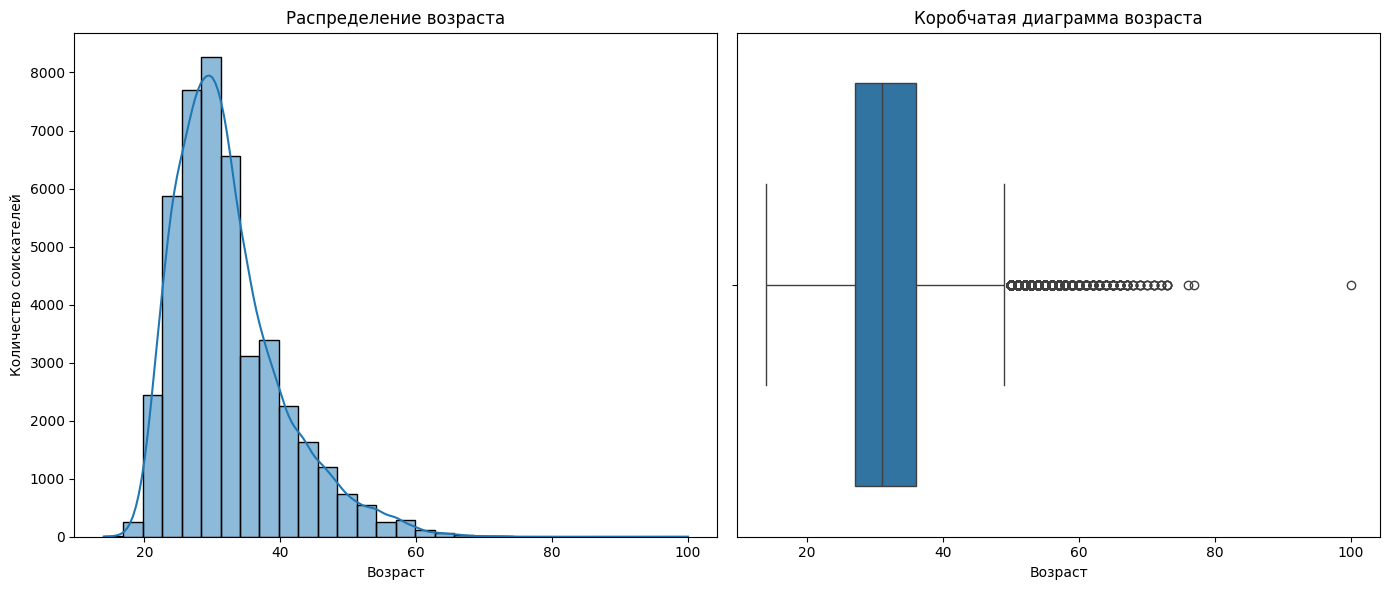

Мода распределения: 30
Минимальный возраст: 14
Максимальный возраст: 100
Медианный возраст: 31.0
Средний возраст: 32.19674146254246
Стандартное отклонение возраста: 7.929799897424101
Количество аномалий: 1
Аномальные значения возраста: [100]


In [197]:
#ваш код здесь
#  Построение гистограммы и коробчатой диаграммы
plt.figure(figsize=(14, 6))

# Гистограмма
plt.subplot(1, 2, 1)
sns.histplot(hh_data['Возраст'], bins=30, kde=True)
plt.title('Распределение возраста')
plt.xlabel('Возраст')
plt.ylabel('Количество соискателей')

# Коробчатая диаграмма
plt.subplot(1, 2, 2)
sns.boxplot(x=hh_data['Возраст'])
plt.title('Коробчатая диаграмма возраста')
plt.xlabel('Возраст')

plt.tight_layout()
plt.show()

# Описание распределения
age_mode = hh_data['Возраст'].mode()[0]
age_min = hh_data['Возраст'].min()
age_max = hh_data['Возраст'].max()
age_median = hh_data['Возраст'].median()
age_mean = hh_data['Возраст'].mean()
age_std = hh_data['Возраст'].std()

print(f"Мода распределения: {age_mode}")
print(f"Минимальный возраст: {age_min}")
print(f"Максимальный возраст: {age_max}")
print(f"Медианный возраст: {age_median}")
print(f"Средний возраст: {age_mean}")
print(f"Стандартное отклонение возраста: {age_std}")

# Проверка на аномалии (например, слишком малый или слишком большой возраст)
age_anomalies = hh_data[(hh_data['Возраст'] < 14) | (hh_data['Возраст'] > 80)]
print(f"Количество аномалий: {age_anomalies.shape[0]}")
print(f"Аномальные значения возраста: {age_anomalies['Возраст'].unique()}")


ваши выводы по графику здесь

2. Постройте распределение признака **"Опыт работы (месяц)"**. Опишите данное распределение, отвечая на следующие вопросы: чему равна мода распределения, каковы предельные значения признака, в каком примерном интервале находится опыт работы большинства соискателей? Есть ли аномалии для признака опыта работы, какие значения вы бы причислили к их числу?
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*

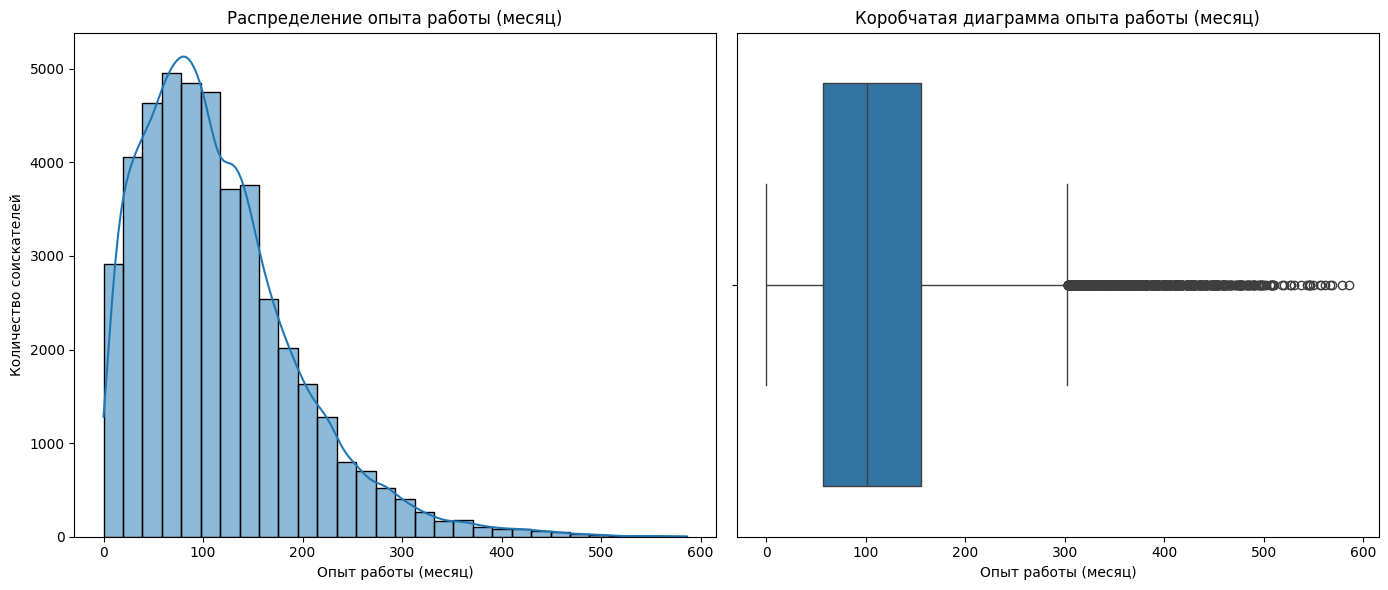

Мода распределения: 81.0
Минимальный опыт работы: 0.0 месяцев
Максимальный опыт работы: 24225.0 месяцев
Медианный опыт работы: 101.0 месяцев
Средний опыт работы: 120.02 месяцев
Стандартное отклонение опыта работы: 351.28 месяцев
Количество аномалий: 13
Аномальные значения опыта работы: [24215.   663.   653. 24202. 24174. 24225. 24218. 24213. 24173.  1191.
 24182.   622.]


In [198]:
#ваш код здесь
# Удаление аномальных значений (меньше 0 или больше 600 месяцев)
hh_data_clean = hh_data[(hh_data['Опыт работы (месяц)'] >= 0) & (hh_data['Опыт работы (месяц)'] <= 600)]

# Построение гистограммы и коробчатой диаграммы
plt.figure(figsize=(14, 6))

# Гистограмма
plt.subplot(1, 2, 1)
sns.histplot(hh_data_clean['Опыт работы (месяц)'], bins=30, kde=True)
plt.title('Распределение опыта работы (месяц)')
plt.xlabel('Опыт работы (месяц)')
plt.ylabel('Количество соискателей')

# Коробчатая диаграмма
plt.subplot(1, 2, 2)
sns.boxplot(x=hh_data_clean['Опыт работы (месяц)'])
plt.title('Коробчатая диаграмма опыта работы (месяц)')
plt.xlabel('Опыт работы (месяц)')

plt.tight_layout()
plt.show()

# Описание распределения
experience_mode = hh_data['Опыт работы (месяц)'].mode()[0]
experience_min = hh_data['Опыт работы (месяц)'].min()
experience_max = hh_data['Опыт работы (месяц)'].max()
experience_median = hh_data['Опыт работы (месяц)'].median()
experience_mean = hh_data['Опыт работы (месяц)'].mean()
experience_std = hh_data['Опыт работы (месяц)'].std()

print(f"Мода распределения: {experience_mode}")
print(f"Минимальный опыт работы: {experience_min} месяцев")
print(f"Максимальный опыт работы: {experience_max} месяцев")
print(f"Медианный опыт работы: {experience_median} месяцев")
print(f"Средний опыт работы: {experience_mean:.2f} месяцев")
print(f"Стандартное отклонение опыта работы: {experience_std:.2f} месяцев")

# Проверка на аномалии (например, слишком малый или слишком большой опыт работы)
experience_anomalies = hh_data[(hh_data['Опыт работы (месяц)'] < 0) | (hh_data['Опыт работы (месяц)'] > 600)]
print(f"Количество аномалий: {experience_anomalies.shape[0]}")
print(f"Аномальные значения опыта работы: {experience_anomalies['Опыт работы (месяц)'].unique()}")


ваши выводы здесь

3. Постройте распределение признака **"ЗП (руб)"**. Опишите данное распределение, отвечая на следующие вопросы: каковы предельные значения признака, в каком примерном интервале находится заработная плата большинства соискателей? Есть ли аномалии для признака возраста? Обратите внимание на гигантские размеры желаемой заработной платы.
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*


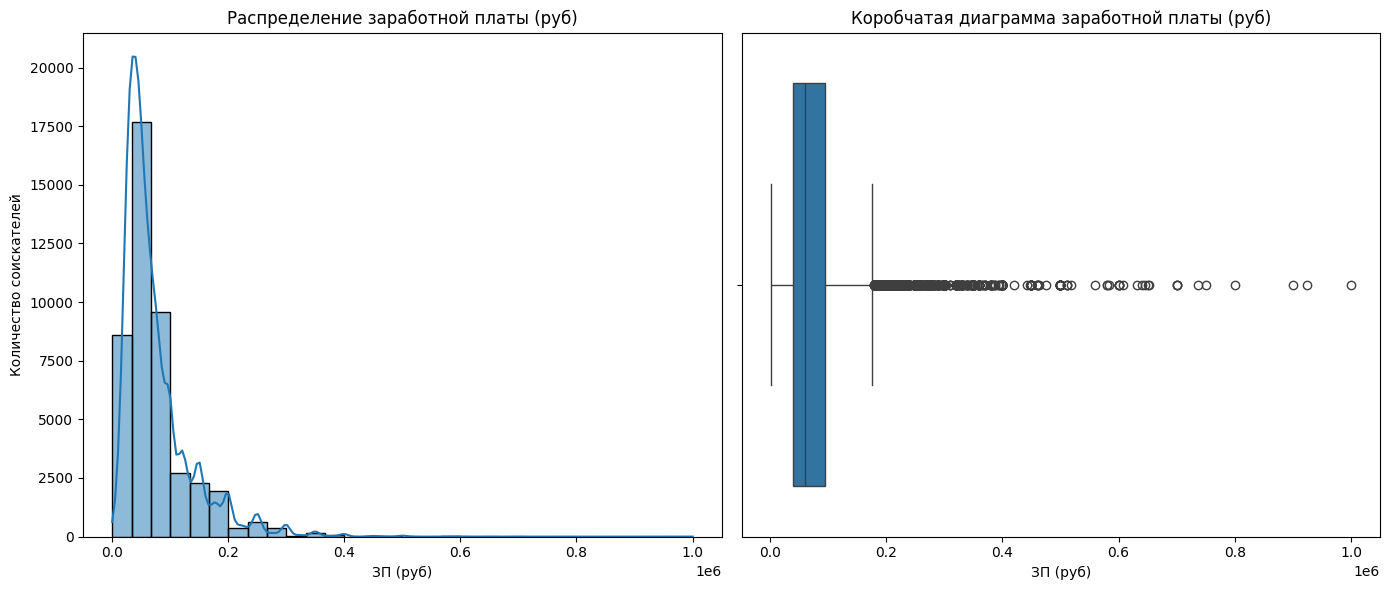

Мода распределения: 50000.0 руб.
Минимальная заработная плата: 1.0 руб.
Максимальная заработная плата: 24304876.0 руб.
Медианная заработная плата: 59037.99999999999 руб.
Средняя заработная плата: 76536.69 руб.
Стандартное отклонение заработной платы: 135935.51 руб.
Количество аномалий: 89
Аномальные значения заработной платы: [4.2000000e+02 1.6000000e+02 4.5275580e+02 1.0000000e+00 2.5000000e+02
 1.8000000e+01 9.0000000e+01 7.1923200e+01 2.6988800e+01 1.5000000e+02
 6.4242200e+01 6.4679400e+01 7.0000000e+02 2.4304876e+07 7.0000000e+01
 4.5000000e+01 6.0000000e+01 5.9552850e+01 1.0000000e+02 5.0000000e+02
 1.6700000e+02 5.5000000e+01 1.2000000e+02 3.0000000e+01 2.2500000e+02
 4.0000000e+01 2.8000000e+02 9.9900000e+02 5.0000000e+01 9.0000000e+02
 6.4246900e+01 7.2946000e+02 6.5000000e+01 1.0100000e+02 2.0000000e+02
 1.8740348e+02 3.0000000e+06 1.4000000e+02 8.4340000e+02 6.3960200e+01
 1.1000000e+02 2.5000000e+01 6.5335000e+01 8.5000000e+01 6.3979800e+01
 1.9900000e+02 1.1100000e+02 7.67

In [199]:
#ваш код здесь
# Удаление аномальных значений (например, меньше 0 или больше 1,5 миллиона)
hh_data_clean = hh_data_clean[(hh_data_clean['ЗП (руб)'] >= 1000) & (hh_data_clean['ЗП (руб)'] <= 1000000)]

# Построение гистограммы и коробчатой диаграммы
plt.figure(figsize=(14, 6))

# Гистограмма
plt.subplot(1, 2, 1)
sns.histplot(hh_data_clean['ЗП (руб)'], bins=30, kde=True)
plt.title('Распределение заработной платы (руб)')
plt.xlabel('ЗП (руб)')
plt.ylabel('Количество соискателей')

# Коробчатая диаграмма
plt.subplot(1, 2, 2)
sns.boxplot(x=hh_data_clean['ЗП (руб)'])
plt.title('Коробчатая диаграмма заработной платы (руб)')
plt.xlabel('ЗП (руб)')

plt.tight_layout()
plt.show()

# Описание распределения
salary_mode = hh_data['ЗП (руб)'].mode()[0]
salary_min = hh_data['ЗП (руб)'].min()
salary_max = hh_data['ЗП (руб)'].max()
salary_median = hh_data['ЗП (руб)'].median()
salary_mean = hh_data['ЗП (руб)'].mean()
salary_std = hh_data['ЗП (руб)'].std()

print(f"Мода распределения: {salary_mode} руб.")
print(f"Минимальная заработная плата: {salary_min} руб.")
print(f"Максимальная заработная плата: {salary_max} руб.")
print(f"Медианная заработная плата: {salary_median} руб.")
print(f"Средняя заработная плата: {salary_mean:.2f} руб.")
print(f"Стандартное отклонение заработной платы: {salary_std:.2f} руб.")

# Проверка на аномалии (например, слишком малая или слишком большая заработная плата)
salary_anomalies = hh_data[(hh_data['ЗП (руб)'] < 1000) | (hh_data['ЗП (руб)'] > 1000000)]
print(f"Количество аномалий: {salary_anomalies.shape[0]}")
print(f"Аномальные значения заработной платы: {salary_anomalies['ЗП (руб)'].unique()}")

ваши выводы здесь

4. Постройте диаграмму, которая показывает зависимость **медианной** желаемой заработной платы (**"ЗП (руб)"**) от уровня образования (**"Образование"**). Используйте для диаграммы данные о резюме, где желаемая заработная плата меньше 1 млн рублей.
*Сделайте выводы по представленной диаграмме: для каких уровней образования наблюдаются наибольшие и наименьшие уровни желаемой заработной платы? Как вы считаете, важен ли признак уровня образования при прогнозировании заработной платы?*

Мода распределения: 50000.0 руб.
Минимальная заработная плата: 1000.0 руб.
Максимальная заработная плата: 923983.0 руб.
Медианная заработная плата: 60000.0 руб.
Средняя заработная плата: 75938.43 руб.
Стандартное отклонение заработной платы: 60527.40 руб.


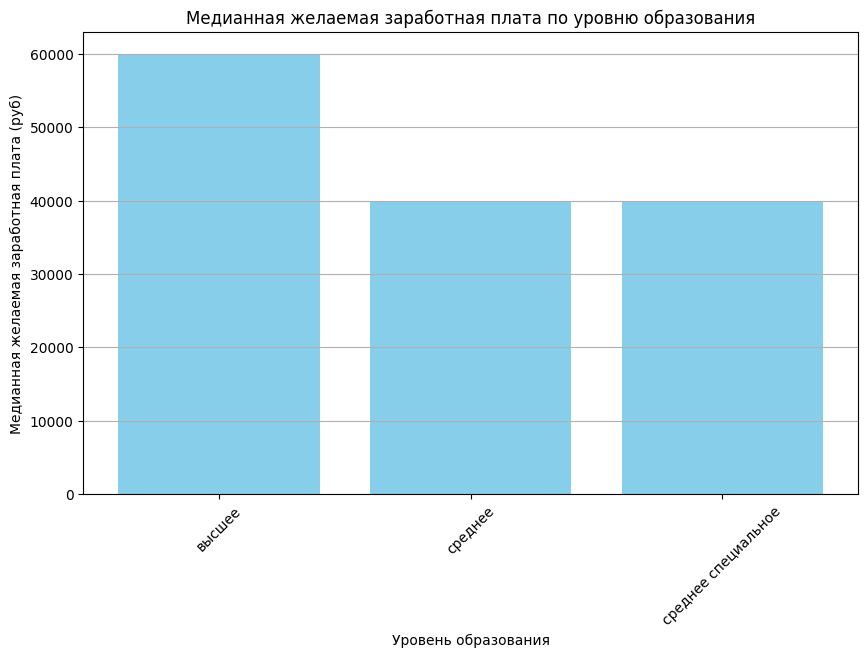

Количество аномалий: 5
Аномальные значения заработной платы: [24304876.  3000000.  7675224.  1750000.  2500000.]


In [200]:
#ваш код здесь
# Удаление аномальных значений (например, меньше 0 или больше 1,5 миллиона)
hh_data_clean = hh_data_clean[(hh_data_clean['ЗП (руб)'] >= 0) & (hh_data_clean['ЗП (руб)'] <= 1500000)]

# Фильтрация данных
df_filtered = hh_data_clean[hh_data_clean['ЗП (руб)'] < 1000000]

# Расчет статистик
salary_mode = df_filtered['ЗП (руб)'].mode()[0]
salary_min = df_filtered['ЗП (руб)'].min()
salary_max = df_filtered['ЗП (руб)'].max()
salary_median = df_filtered['ЗП (руб)'].median()
salary_mean = df_filtered['ЗП (руб)'].mean()
salary_std = df_filtered['ЗП (руб)'].std()

# Вывод статистик
print(f"Мода распределения: {salary_mode} руб.")
print(f"Минимальная заработная плата: {salary_min} руб.")
print(f"Максимальная заработная плата: {salary_max} руб.")
print(f"Медианная заработная плата: {salary_median} руб.")
print(f"Средняя заработная плата: {salary_mean:.2f} руб.")
print(f"Стандартное отклонение заработной платы: {salary_std:.2f} руб.")

# Расчет медианной заработной платы по уровням образования
median_salary = df_filtered.groupby('Образование')['ЗП (руб)'].median().reset_index()

# Построение диаграммы
plt.figure(figsize=(10, 6))
plt.bar(median_salary['Образование'], median_salary['ЗП (руб)'], color='skyblue')
plt.title('Медианная желаемая заработная плата по уровню образования')
plt.xlabel('Уровень образования')
plt.ylabel('Медианная желаемая заработная плата (руб)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

# Проверка на аномалии (например, слишком малая или слишком большая заработная плата)
salary_anomalies = hh_data[(hh_data['ЗП (руб)'] < 0) | (hh_data['ЗП (руб)'] > 1500000)]
print(f"Количество аномалий: {salary_anomalies.shape[0]}")
print(f"Аномальные значения заработной платы: {salary_anomalies['ЗП (руб)'].unique()}")

ваши выводы здесь

5. Постройте диаграмму, которая показывает распределение желаемой заработной платы (**"ЗП (руб)"**) в зависимости от города (**"Город"**). Используйте для диаграммы данные о резюме, где желая заработная плата меньше 1 млн рублей.
*Сделайте выводы по полученной диаграмме: как соотносятся медианные уровни желаемой заработной платы и их размах в городах? Как вы считаете, важен ли признак города при прогнозировании заработной платы?*

Город: город-миллионник
  Мода: 40000.0 руб.
  Минимальная ЗП: 1000.0 руб.
  Максимальная ЗП: 511681.6 руб.
  Медианная ЗП: 40000.0 руб.
  Средняя ЗП: 51764.77 руб.
  Стандартное отклонение: 35356.45 руб.
  Размах: 510681.6 руб.

Город: другие
  Мода: 50000.0 руб.
  Минимальная ЗП: 1000.0 руб.
  Максимальная ЗП: 923983.0 руб.
  Медианная ЗП: 60000.0 руб.
  Средняя ЗП: 80668.65 руб.
  Стандартное отклонение: 63238.84 руб.
  Размах: 922983.0 руб.



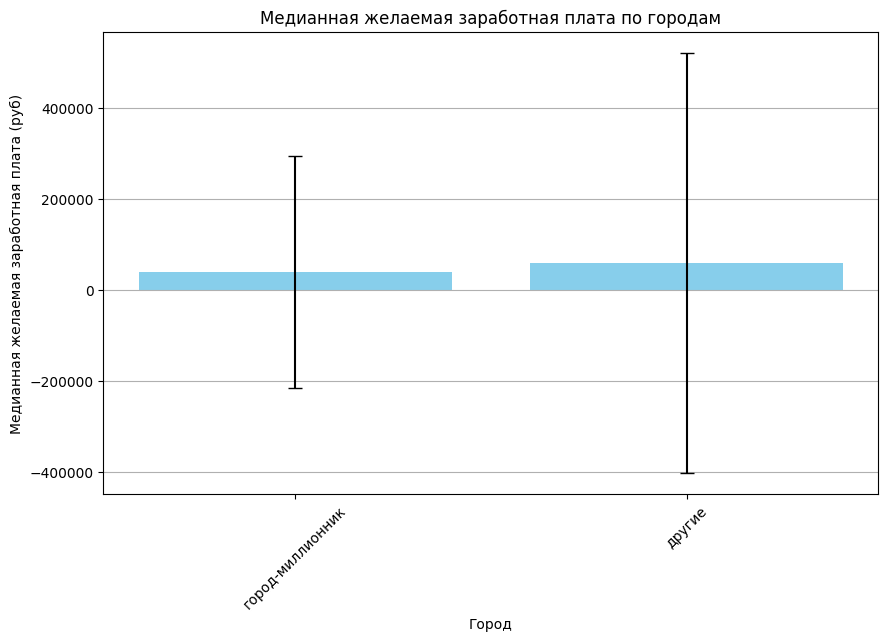

Количество аномалий: 5
Аномальные значения заработной платы: [24304876.  3000000.  7675224.  1750000.  2500000.]


In [201]:
#ваш код здесь
# Удаление аномальных значений (например, меньше 0 или больше 1,5 миллиона)
hh_data_clean = hh_data_clean[(hh_data_clean['ЗП (руб)'] >= 0) & (hh_data_clean['ЗП (руб)'] <= 1500000)]

# Фильтрация данных
df_filtered = hh_data_clean[hh_data_clean['ЗП (руб)'] < 1000000]

# Расчет статистик по городам
salary_stats = df_filtered.groupby('Город')['ЗП (руб)'].agg(['median', 'min', 'max']).reset_index()
salary_stats['range'] = salary_stats['max'] - salary_stats['min']

# Дополнительные статистики
salary_stats['mode'] = df_filtered.groupby('Город')['ЗП (руб)'].agg(lambda x: x.mode()[0]).values
salary_stats['mean'] = df_filtered.groupby('Город')['ЗП (руб)'].mean().values
salary_stats['std'] = df_filtered.groupby('Город')['ЗП (руб)'].std().values

# Вывод статистик
for index, row in salary_stats.iterrows():
    print(f"Город: {row['Город']}")
    print(f"  Мода: {row['mode']} руб.")
    print(f"  Минимальная ЗП: {row['min']} руб.")
    print(f"  Максимальная ЗП: {row['max']} руб.")
    print(f"  Медианная ЗП: {row['median']} руб.")
    print(f"  Средняя ЗП: {row['mean']:.2f} руб.")
    print(f"  Стандартное отклонение: {row['std']:.2f} руб.")
    print(f"  Размах: {row['range']} руб.")
    print()

# Построение диаграммы
plt.figure(figsize=(10, 6))
plt.bar(salary_stats['Город'], salary_stats['median'], color='skyblue', yerr=salary_stats['range'] / 2, capsize=5)
plt.title('Медианная желаемая заработная плата по городам')
plt.xlabel('Город')
plt.ylabel('Медианная желаемая заработная плата (руб)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

# Проверка на аномалии (например, слишком малая или слишком большая заработная плата)
salary_anomalies = hh_data[(hh_data['ЗП (руб)'] < 0) | (hh_data['ЗП (руб)'] > 1500000)]
print(f"Количество аномалий: {salary_anomalies.shape[0]}")
print(f"Аномальные значения заработной платы: {salary_anomalies['ЗП (руб)'].unique()}")

ваши выводы здесь

6. Постройте **многоуровневую столбчатую диаграмму**, которая показывает зависимость медианной заработной платы (**"ЗП (руб)"**) от признаков **"Готовность к переезду"** и **"Готовность к командировкам"**. Проанализируйте график, сравнив уровень заработной платы в категориях.

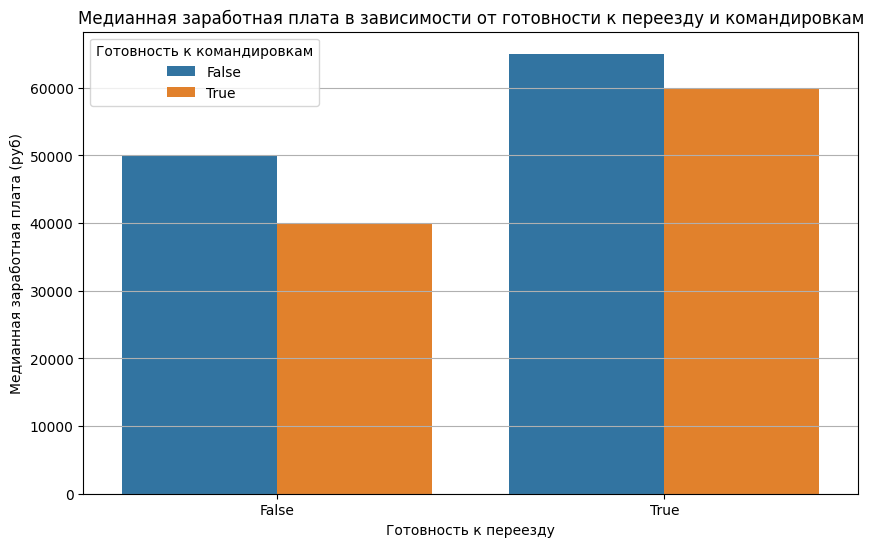

In [202]:
#ваш код здесь
median_salary = hh_data_clean.groupby(['Готовность к переезду', 'Готовность к командировкам'])['ЗП (руб)'].median().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(data=median_salary, x='Готовность к переезду', y='ЗП (руб)', hue='Готовность к командировкам')
plt.title('Медианная заработная плата в зависимости от готовности к переезду и командировкам')
plt.xlabel('Готовность к переезду')
plt.ylabel('Медианная заработная плата (руб)')
plt.legend(title='Готовность к командировкам')
plt.grid(axis='y')
plt.show()

In [203]:
#ваши выводы здесь

7. Постройте сводную таблицу, иллюстрирующую зависимость **медианной** желаемой заработной платы от возраста (**"Возраст"**) и образования (**"Образование"**). На полученной сводной таблице постройте **тепловую карту**. Проанализируйте тепловую карту, сравнив показатели внутри групп.

Образование     высшее  среднее  среднее специальное
Возраст                                             
14            60000.00      NaN                  NaN
15                 NaN  10000.0               2000.0
16           122582.49      NaN              30000.0
17            80000.00  44000.0              22500.0
18            25000.00  35000.0              25151.0
...                ...      ...                  ...
72            75000.00      NaN                  NaN
73            75000.00      NaN                  NaN
76            45000.00      NaN                  NaN
77            90000.00      NaN                  NaN
100                NaN      NaN              60000.0

[63 rows x 3 columns]


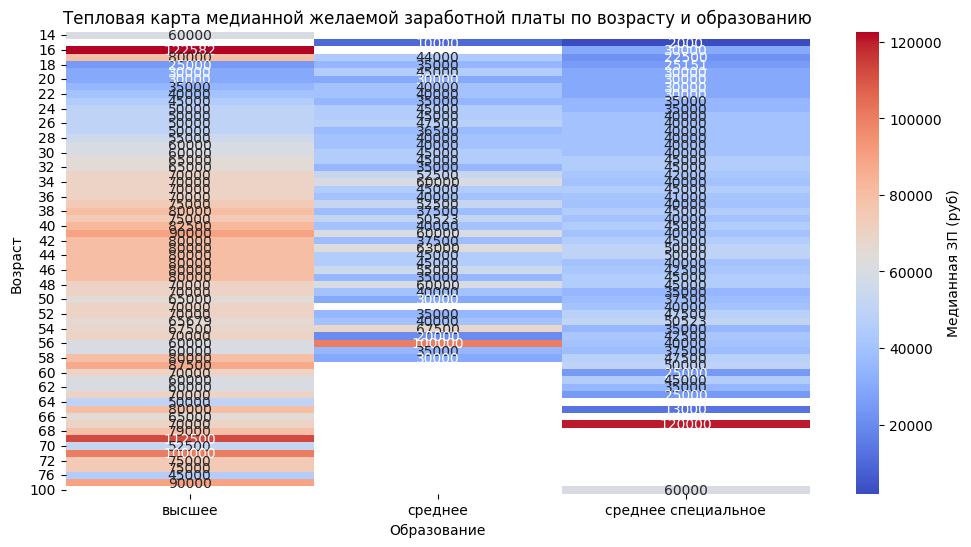

In [204]:
#ваш код здесь
# Удаление аномальных значений
hh_data_clean = hh_data_clean[(hh_data_clean['ЗП (руб)'] >= 0) & (hh_data_clean['ЗП (руб)'] <= 1500000)]

# Создание сводной таблицы
pivot_table = hh_data_clean.pivot_table(values='ЗП (руб)', 
                                         index='Возраст', 
                                         columns='Образование', 
                                         aggfunc='median')

# Вывод сводной таблицы
print(pivot_table)

# Построение тепловой карты
plt.figure(figsize=(12, 6))
sns.heatmap(pivot_table, annot=True, fmt=".0f", cmap='coolwarm', cbar_kws={'label': 'Медианная ЗП (руб)'})
plt.title('Тепловая карта медианной желаемой заработной платы по возрасту и образованию')
plt.xlabel('Образование')
plt.ylabel('Возраст')
plt.show()

ваши выводы здесь

8. Постройте **диаграмму рассеяния**, показывающую зависимость опыта работы (**"Опыт работы (месяц)"**) от возраста (**"Возраст"**). Опыт работы переведите из месяцев в года, чтобы признаки были в едином масштабе. Постройте на графике дополнительно прямую, проходящую через точки (0, 0) и (100, 100). Данная прямая соответствует значениям, когда опыт работы равен возрасту человека. Точки, лежащие на этой прямой и выше нее - аномалии в наших данных (опыт работы больше либо равен возрасту соискателя)

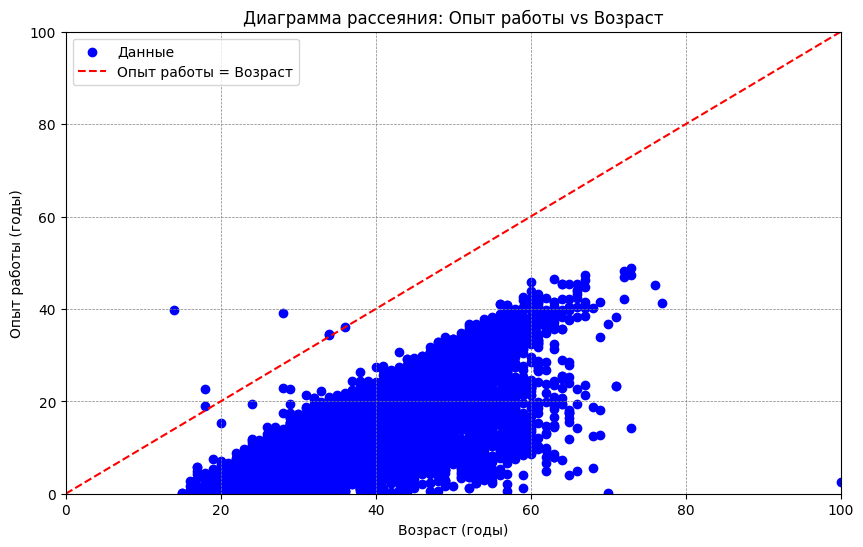

Аномалии (опыт работы больше или равен возрасту):
                Ищет работу на должность:  \
3813   Помощник системного администратора   
4535               Технический специалист   
19351     Специалист (Junior-программист)   
19872                            Аналитик   
26477                Менеджер IT-проектов   
29098         Ведущий инженер-программист   
43451      Руководитель отдела разработки   

                         Последнее/нынешнее место работы  \
3813                                             Uniflex   
4535                                                   а   
19351                                  Русский свет, ООО   
19872                                           Kyivstar   
26477  М©й IT'M  ("Информационные Технологии' Менеджм...   
29098                           КБ Аметист, Концерн АГАТ   
43451                                              ЛАНИТ   

           Последняя/нынешняя должность Обновление резюме        Авто  \
3813                  Тренер-инстру

In [205]:
#ваш код здесь
hh_data_clean['Опыт работы (год)'] = hh_data_clean['Опыт работы (месяц)'] / 12

# Построение диаграммы рассеяния
plt.figure(figsize=(10, 6))
plt.scatter(hh_data_clean['Возраст'], hh_data_clean['Опыт работы (год)'], color='blue', label='Данные')

# Добавление прямой y = x
x_values = range(0, 101)  # от 0 до 100
plt.plot(x_values, x_values, color='red', linestyle='--', label='Опыт работы = Возраст')

# Настройка графика
plt.title('Диаграмма рассеяния: Опыт работы vs Возраст')
plt.xlabel('Возраст (годы)')
plt.ylabel('Опыт работы (годы)')
plt.xlim(0, 100)
plt.ylim(0, 100)
plt.axhline(0, color='black', linewidth=0.5, ls='--')
plt.axvline(0, color='black', linewidth=0.5, ls='--')
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.legend()
plt.show()

# Анализ аномалий
anomalies = hh_data_clean[hh_data_clean['Опыт работы (год)'] >= hh_data_clean['Возраст']]
print("Аномалии (опыт работы больше или равен возрасту):")
print(anomalies)

# Фильтрация данных для точек выше прямой y = x
points_above_line = hh_data_clean[hh_data_clean['Опыт работы (год)'] > hh_data_clean['Возраст']]

# Вычисление количества точек выше прямой y = x
num_points_above_line = points_above_line.shape[0]

print(f"Количество точек, лежащих строго выше прямой y = x: {num_points_above_line}")
print("Наблюдения, лежащие выше прямой y = x:")
print(points_above_line)


ваши выводы здесь

**Дополнительные баллы**

Для получения 2 дополнительных баллов по разведывательному анализу постройте еще два любых содержательных графика или диаграммы, которые помогут проиллюстрировать влияние признаков/взаимосвязь между признаками/распределения признаков. Приведите выводы по ним. Желательно, чтобы в анализе участвовали признаки, которые мы создавали ранее в разделе "Преобразование данных".


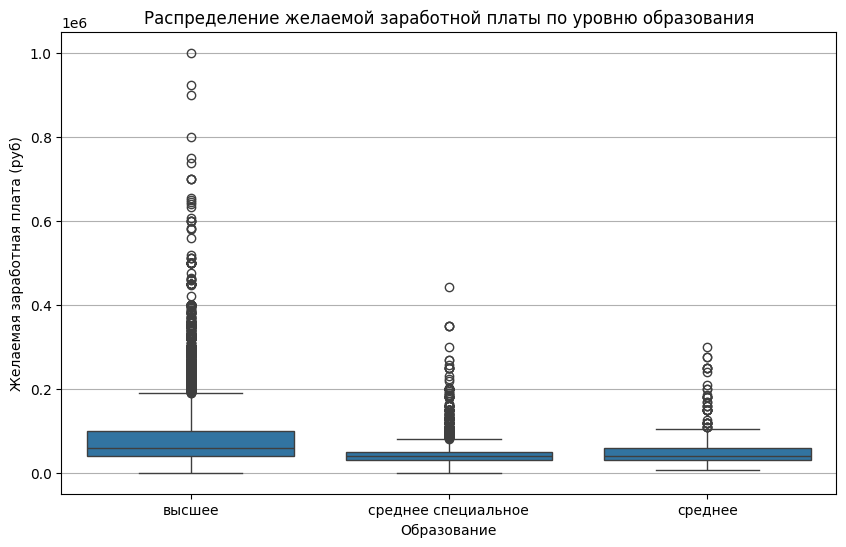

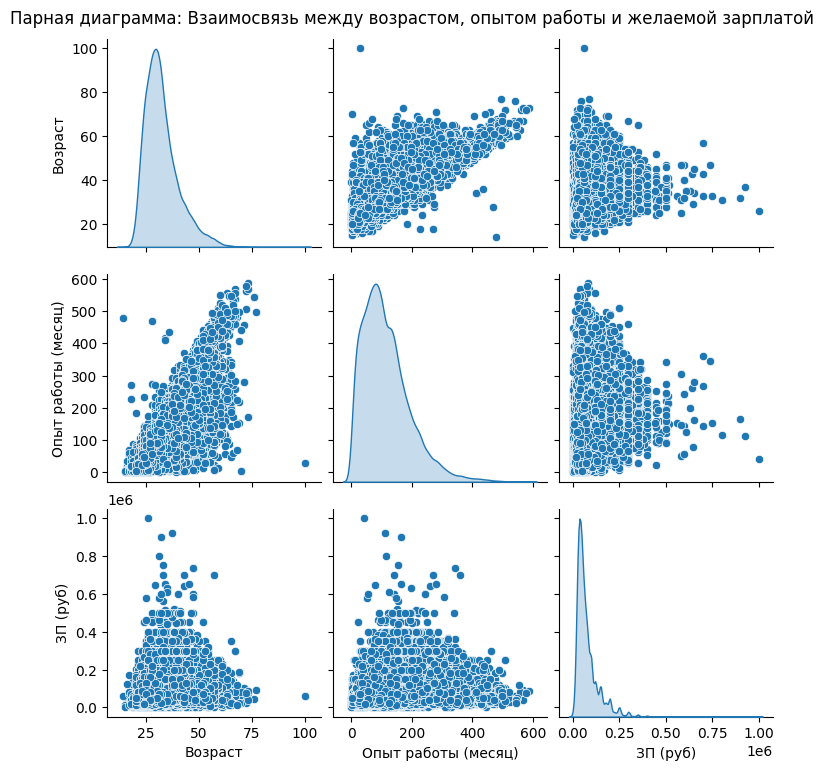

In [206]:
#ваш код здесь
# 1. Ящик с усами (box plot) для анализа желаемой заработной платы по образованию
plt.figure(figsize=(10, 6))
sns.boxplot(x='Образование', y='ЗП (руб)', data=hh_data_clean)
plt.title('Распределение желаемой заработной платы по уровню образования')
plt.xlabel('Образование')
plt.ylabel('Желаемая заработная плата (руб)')
plt.grid(axis='y')
plt.show()

# Выводы по ящику с усами
# 1. Видно, что уровень образования влияет на желаемую заработную плату.
# 2. Соискатели с высшим образованием имеют более высокую медианную зарплату и большее разброс значений по сравнению соискателями со средним образованием.

# 2. Парная диаграмма (pair plot) для визуализации взаимосвязи между возрастом, опытом работы и желаемой зарплатой
sns.pairplot(hh_data_clean[['Возраст', 'Опыт работы (месяц)', 'ЗП (руб)']], diag_kind='kde')
plt.suptitle('Парная диаграмма: Взаимосвязь между возрастом, опытом работы и желаемой зарплатой', y=1.02)
plt.show()

# Выводы по парной диаграмме
# 1. Существует положительная корреляция между возрастом и желаемой заработной платой, что может указывать на то, что более опытные работники ожидают более высокую зарплату.
# 2. Также наблюдается положительная корреляция между опытом работы и желаемой заработной платой, что логично, так как работники с большим опытом часто требуют более высокую компенсацию.

ваши выводы здесь

# Очистка данных

1. Начнем с дубликатов в наших данных. Найдите **полные дубликаты** в таблице с резюме и удалите их. 

In [ ]:
# ваш код здесь
# Поиск и подсчет полных дубликатов
duplicates = hh_data_clean.duplicated()
num_duplicates = duplicates.sum()

print(f"Количество полных дубликатов: {num_duplicates}")

# Удаление полных дубликатов
hh_data_clean = hh_data_clean.drop_duplicates()

# Вывод результата
print(f"Количество строк после удаления дубликатов: {hh_data_clean.shape[0]}")


Количество полных дубликатов: 156
Количество строк после удаления дубликатов: 44317


2. Займемся пропусками. Выведите информацию **о числе пропусков** в столбцах. 

In [214]:
# ваш код здесь
missing_values = hh_data_clean.isnull().sum()
print("\nЧисло пропусков в столбцах:")
print(missing_values)


# Вывод информации о числе пропусков в столбцах
missing_values = hh_data_clean.isnull().sum()

print("Число пропусков в столбцах:")
print(missing_values)

# Подсчет числа пропусков в столбце «Опыт работы (месяц)»
missing_experience = missing_values['Опыт работы (месяц)']
print(f"Число пропусков в столбце «Опыт работы (месяц)»: {missing_experience}")



Число пропусков в столбцах:
Ищет работу на должность:              0
Последнее/нынешнее место работы        1
Последняя/нынешняя должность           2
Обновление резюме                      0
Авто                                   0
Образование                            0
Пол                                    0
Возраст                                0
Опыт работы (месяц)                    0
Город                                  0
Готовность к переезду               2145
Готовность к командировкам             0
волонтерство                           0
полная занятость                       0
проектная работа                       0
стажировка                             0
частичная занятость                    0
вахтовый метод                         0
гибкий график                          0
полный день                            0
сменный график                         0
удаленная работа                       0
Дата обновления резюме                 0
per                         

3. Итак, у нас есть пропуски в 3ех столбцах: **"Опыт работы (месяц)"**, **"Последнее/нынешнее место работы"**, **"Последняя/нынешняя должность"**. Поступим следующим образом: удалите строки, где есть пропуск в столбцах с местом работы и должностью. Пропуски в столбце с опытом работы заполните **медианным** значением.

In [209]:
#ваш код здесь
# ## Удаляем строки с пропусками в столбцах "Последнее/нынешнее место работы" и "Последняя/нынешняя должность"
data_hh = hh_data.dropna(subset=['Последнее/нынешнее место работы', 'Последняя/нынешняя должность'])

# Заполняем пропуски в столбце "Опыт работы (месяц)" медианным значением
median_experience = hh_data['Опыт работы (месяц)'].median()
hh_data['Опыт работы (месяц)'].fillna(median_experience, inplace=True)

# Рассчитываем среднее значение
average_experience = hh_data['Опыт работы (месяц)'].mean()

# Округляем результат до целых
rounded_average_experience = round(average_experience)

print("\nДанные после удаления пропусков и заполнения медианой:")
print(data_hh)

print("\nРезультирующее среднее значение: ", rounded_average_experience)





Данные после удаления пропусков и заполнения медианой:
                               Ищет работу на должность:  \
0                                Системный администратор   
1                                   Технический писатель   
2                                               Оператор   
3      Веб-разработчик (HTML / CSS / JS / PHP / базы ...   
4                      Региональный менеджер по продажам   
...                                                  ...   
44739  Финансист, аналитик, экономист, бухгалтер, мен...   
44740             Системный администратор, IT-специалист   
44741                         Аналитик данных, Математик   
44742                                   Контент-менеджер   
44743                               Руководитель проекта   

                         Последнее/нынешнее место работы  \
0                                МАОУ "СОШ № 1 г.Немана"   
1                           Временный трудовой коллектив   
2                                          

C:\Users\Vxlaks\AppData\Local\Temp\ipykernel_13980\2694533936.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  hh_data['Опыт работы (месяц)'].fillna(median_experience, inplace=True)


4. Мы добрались до ликвидации выбросов. Сначала очистим данные вручную. Удалите резюме, в которых указана заработная плата либо выше 1 млн. рублей, либо ниже 1 тыс. рублей.

In [210]:
#ваш код здесь
# Подсчитываем количество строк до удаления аномалий
initial_count = len(hh_data)

# Удаляем резюме с заработной платой выше 1 млн или ниже 1 тыс. рублей
hh_data = hh_data[(hh_data['ЗП (руб)'] <= 1000000) & (hh_data['ЗП (руб)'] >= 1000)]

# Подсчитываем количество строк после удаления аномалий
final_count = len(hh_data)

# Вычисляем количество удаленных аномалий
anomalies_count = initial_count - final_count

# Выводим очищенные данные
print("\nДанные после удаления резюме с выбросами по заработной плате:")
print(hh_data)

# Выводим количество удаленных аномалий
print("\nКоличество удаленных аномалий: ", anomalies_count)



Данные после удаления резюме с выбросами по заработной плате:
                               Ищет работу на должность:  \
0                                Системный администратор   
1                                   Технический писатель   
2                                               Оператор   
3      Веб-разработчик (HTML / CSS / JS / PHP / базы ...   
4                      Региональный менеджер по продажам   
...                                                  ...   
44739  Финансист, аналитик, экономист, бухгалтер, мен...   
44740             Системный администратор, IT-специалист   
44741                         Аналитик данных, Математик   
44742                                   Контент-менеджер   
44743                               Руководитель проекта   

                         Последнее/нынешнее место работы  \
0                                МАОУ "СОШ № 1 г.Немана"   
1                           Временный трудовой коллектив   
2                                   

5. В процессе разведывательного анализа мы обнаружили резюме, в которых **опыт работы в годах превышал возраст соискателя**. Найдите такие резюме и удалите их из данных


In [211]:
#ваш код здесь
# Подсчитываем количество резюме до удаления аномалий
initial_count = len(hh_data_clean)

# Находим и удаляем резюме, где опыт работы в годах превышает возраст
hh_data_cleaned = hh_data_clean[(hh_data_clean['Опыт работы (месяц)'] / 12) <= hh_data_clean['Возраст']]

# Подсчитываем количество резюме после удаления аномалий
final_count = len(hh_data_cleaned)

# Вычисляем количество удаленных аномалий
anomalies_count = initial_count - final_count

# Выводим очищенные данные
print("\nДанные после удаления резюме с опытом работы, превышающим возраст:")
print(hh_data_cleaned)

# Выводим количество удаленных аномалий
print("\nКоличество удаленных резюме с опытом работы, превышающим возраст: ", anomalies_count)



Данные после удаления резюме с опытом работы, превышающим возраст:
                               Ищет работу на должность:  \
0                                Системный администратор   
1                                   Технический писатель   
2                                               Оператор   
3      Веб-разработчик (HTML / CSS / JS / PHP / базы ...   
4                      Региональный менеджер по продажам   
...                                                  ...   
44739  Финансист, аналитик, экономист, бухгалтер, мен...   
44740             Системный администратор, IT-специалист   
44741                         Аналитик данных, Математик   
44742                                   Контент-менеджер   
44743                               Руководитель проекта   

                         Последнее/нынешнее место работы  \
0                                МАОУ "СОШ № 1 г.Немана"   
1                           Временный трудовой коллектив   
2                              

6. В результате анализа мы обнаружили потенциальные выбросы в признаке **"Возраст"**. Это оказались резюме людей чересчур преклонного возраста для поиска работы. Попробуйте построить распределение признака в **логарифмическом масштабе**. Добавьте к графику линии, отображающие **среднее и границы интервала метода трех сигм**. Напомним, сделать это можно с помощью метода axvline. Например, для построение линии среднего будет иметь вид:

`histplot.axvline(log_age.mean(), color='k', lw=2)`

В какую сторону асимметрично логарифмическое распределение? Напишите об этом в комментарии к графику.
Найдите выбросы с помощью метода z-отклонения и удалите их из данных, используйте логарифмический масштаб. Давайте сделаем послабление на **1 сигму** (возьмите 4 сигмы) в **правую сторону**.

Выведите таблицу с полученными выбросами и оцените, с каким возрастом соискатели попадают под категорию выбросов?

C:\Users\Vxlaks\AppData\Local\Temp\ipykernel_13980\3364889339.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hh_data_cleaned['log_возраст'] = np.log(hh_data_clean['Возраст'])


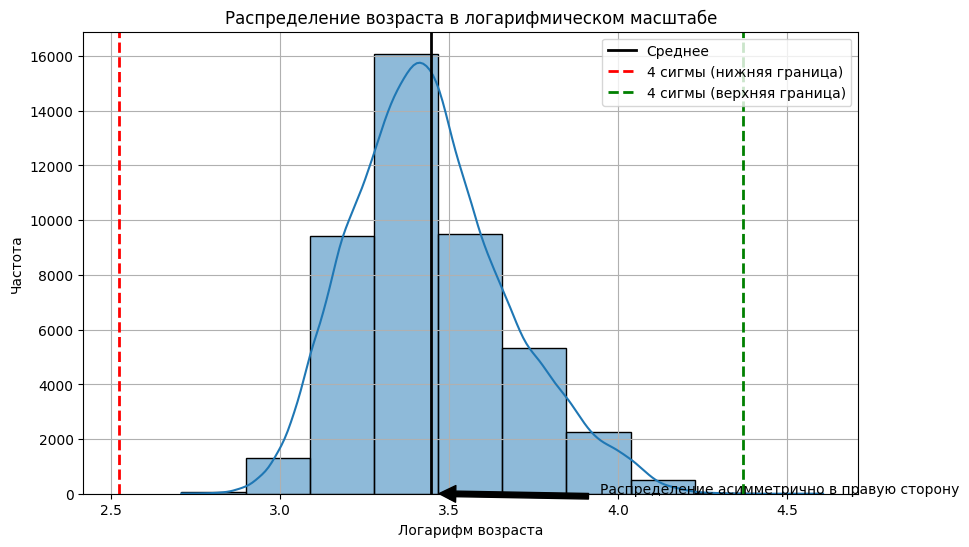

Выбросы по возрасту:
       Возраст  log_возраст   z_score
33654      100      4.60517  5.030497
Количество выбросов: 1


C:\Users\Vxlaks\AppData\Local\Temp\ipykernel_13980\3364889339.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hh_data_cleaned['z_score'] = (hh_data_cleaned['log_возраст'] - mean_age) / std_age


In [212]:
#ваш код здесь
hh_data_cleaned['log_возраст'] = np.log(hh_data_clean['Возраст'])

# Визуализируем распределение возраста в логарифмическом масштабе
plt.figure(figsize=(10, 6))
histplot = sns.histplot(hh_data_cleaned['log_возраст'], bins=10, kde=True)

# Вычисляем среднее и границы интервала метода трех сигм
mean_age = hh_data_cleaned['log_возраст'].mean()
std_age = hh_data_cleaned['log_возраст'].std()
lower_bound = mean_age - 4 * std_age
upper_bound = mean_age + 4 * std_age

# Добавляем линии на график
histplot.axvline(mean_age, color='k', lw=2, label='Среднее')
histplot.axvline(lower_bound, color='r', linestyle='--', lw=2, label='4 сигмы (нижняя граница)')
histplot.axvline(upper_bound, color='g', linestyle='--', lw=2, label='4 сигмы (верхняя граница)')

# Добавляем легенду и заголовок
plt.legend()
plt.title('Распределение возраста в логарифмическом масштабе')
plt.xlabel('Логарифм возраста')
plt.ylabel('Частота')
plt.grid()

# Добавляем комментарий к графику
plt.annotate('Распределение асимметрично в правую сторону', xy=(mean_age, 10), xytext=(mean_age + 0.5, 10),
             arrowprops=dict(facecolor='black', shrink=0.05))

# Показываем график
plt.show()

# Находим выбросы с помощью метода z-отклонения
hh_data_cleaned['z_score'] = (hh_data_cleaned['log_возраст'] - mean_age) / std_age
outliers = hh_data_cleaned[hh_data_cleaned['z_score'] > 4]

# Выводим таблицу с выбросами
print("Выбросы по возрасту:")
print(outliers[['Возраст', 'log_возраст', 'z_score']])

# Подсчитываем количество выбросов
num_outliers = outliers.shape[0]
print(f"Количество выбросов: {num_outliers}")


ваш коммментарий здесь